In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

In [2]:
files = [
    "data1_day1/20210303-0001_01.txt",
    "data1_day1/20210303-0001_02.txt",
    "data1_day1/20210303-0001_03.txt",
    "data1_day1/20210303-0001_04.txt"
]
data = np.loadtxt(files[0], skiprows=3)
for f in files[1:]:
    data = np.concatenate((data, np.loadtxt(f, skiprows=3)))

In [3]:
start = 400
end = 10000
max_detector_voltage = np.max(data[start:end,1])
intensity = data[start:end,1]/max_detector_voltage
driving_volt = data[start:end,2]/np.max(data[start:end,2])

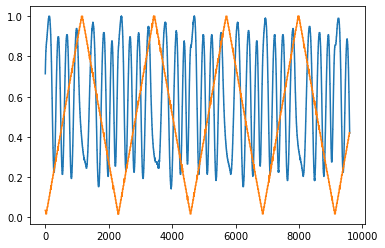

In [4]:
plt.plot(intensity)
plt.plot(driving_volt)

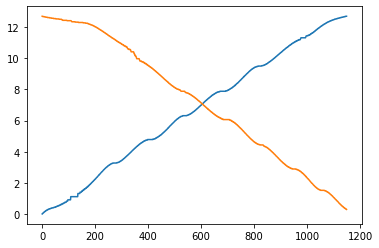

In [7]:
triangle_len = 2300
turning_point = int(triangle_len/2)

part1 = np.cumsum(np.abs(np.diff(np.arccos(2*intensity-1)))[:turning_point])
part2 = part1[-1] - np.cumsum(np.abs(np.diff(np.arccos(2*intensity-1)))[turning_point:triangle_len])
plt.plot(part1)
plt.plot(part2)

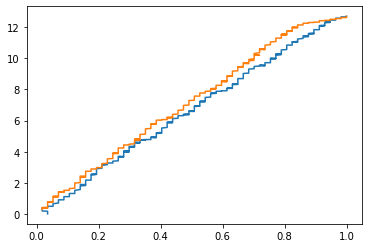

In [8]:
plt.plot(driving_volt[0:turning_point], part1)
plt.plot(driving_volt[turning_point:triangle_len], part2)